In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

读取数据

In [ ]:
data = pd.read_csv("train.csv")
data.head(), data.shape, data.describe()

EDA数据探索与处理

In [ ]:
#图形可视化，查看数据是否平衡
import seaborn as sns
sns.countplot(data.target)
plt.show()
#数据样本不均衡 需要继续后期处理

In [ ]:
#针对数据不平衡问题 我们进行随机欠采样来获取平衡的数据
y = data['target']
x = data.drop(['id', 'target'], axis=1)

rus = RandomUnderSampler(random_state=0)
x_resampled , y_resampled = rus.fit_resample(x, y)

#画图来验证一下效果
sns.countplot(y_resampled)
plt.show()

In [ ]:
#把数据里的字符串数值化
le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)

分割数据

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

模型训练

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)
y_pre = rf.predict(x_test)

In [ ]:
y_pre, y_test

模型评估

In [ ]:
from sklearn.metrics import log_loss
#logloss使用过程中必须要求输出用one-hot表示
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)
y_test = one_hot.fit_transform(y_test.reshape(-1, 1))
y_pre = one_hot.fit_transform(y_pre.reshape(-1, 1))
log_loss(y_test, y_pre, eps=1e-15, normalize=True)

In [ ]:
#还可以通过改变预测值的输出形式来降低logloss
y_pre_proba = rf.predict_proba(x_test)
log_loss(y_test, y_pre_proba, eps=1e-15, normalize=True)

模型调优

In [107]:
#确定最优的n_estimators
tuned_parameters = range(10, 200, 10)

#创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

#创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

#调优过程实现
for i, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=one_parameter, 
                                 max_depth=10, 
                                 max_features=10, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    rf2.fit(x_train, y_train)
    #输出accuracy
    accuracy_t[i] = rf2.oob_score_
    #输出logloss
    y_pre = rf2.predict_proba(x_test)
    error_t[i] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 0.
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 0.         0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 1.1144584  0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 1.1144584  1.11349295 0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 1.1144584  1.11349295 1.11333631 0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 1.1144584  1.11349295 1.11333631 1.11278402
 0.        ]
[1.12581911 1.1159451  1.12240197 1.12194134 1.11840309 1.11677296
 1.11509421 1.11691066 1.11925709 1.11575479 1.11482642 1.11585932
 1.11497157 1.11566189 1.1144584  1.11349295 1.11333631 1.11278402
 1.1128379 ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


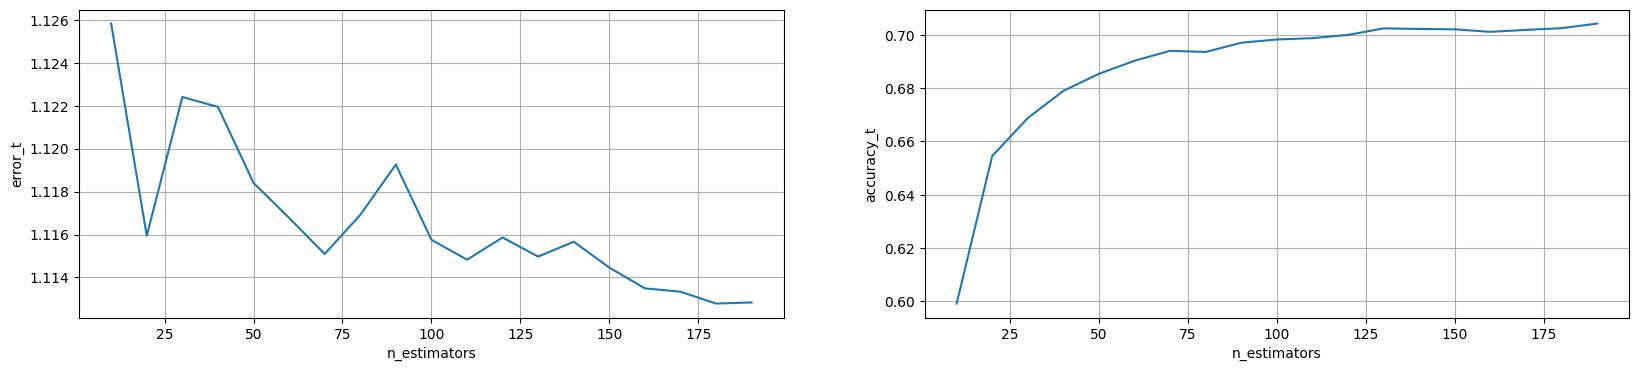

In [108]:
#优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi = 100)
axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("error_t")

axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()


In [109]:
#确定最优的max_features
tuned_parameters = range(5, 40, 5)

#创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

#创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

#调优过程实现
for i, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=10, 
                                 max_features=one_parameter, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    rf2.fit(x_train, y_train)
    #输出accuracy
    accuracy_t[i] = rf2.oob_score_
    #输出logloss
    y_pre = rf2.predict_proba(x_test)
    error_t[i] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)

c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.21134932 0.         0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.21134932 1.11337987 0.         0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.21134932 1.11337987 1.08098473 0.         0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.21134932 1.11337987 1.08098473 1.0673068  0.         0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.21134932 1.11337987 1.08098473 1.0673068  1.05898819 0.
 0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.21134932 1.11337987 1.08098473 1.0673068  1.05898819 1.05663329
 0.        ]
[1.21134932 1.11337987 1.08098473 1.0673068  1.05898819 1.05663329
 1.05722817]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


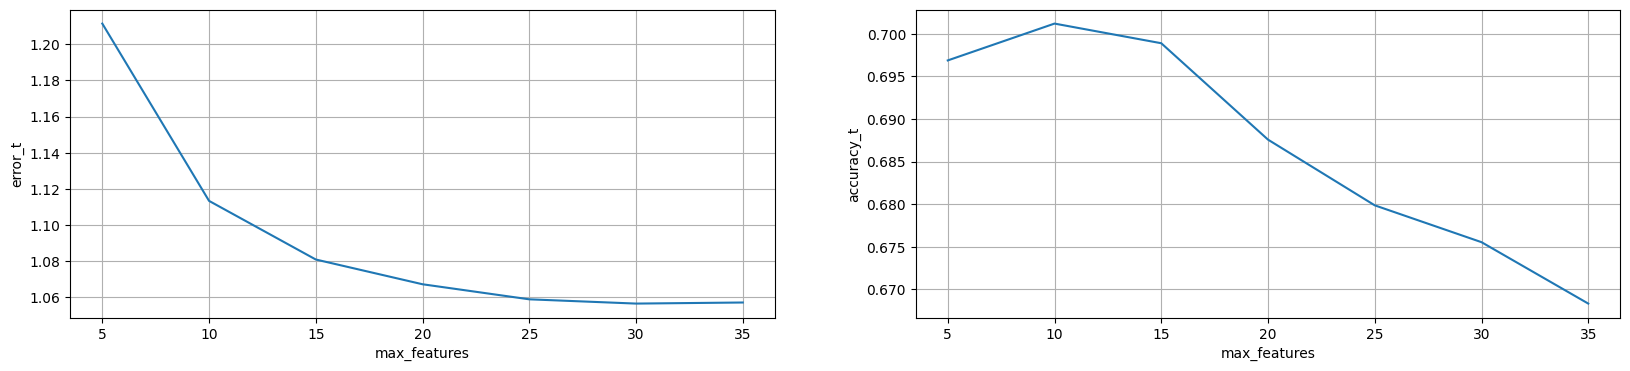

In [110]:
#优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi = 100)
axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_features")
axes[0].set_ylabel("error_t")

axes[1].set_xlabel("max_features")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()

In [111]:
#确定最优的max_depth
tuned_parameters = range(10, 100, 5)

#创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

#创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

#调优过程实现
for i, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=one_parameter, 
                                 max_features=15, 
                                 min_samples_leaf=10, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    rf2.fit(x_train, y_train)
    #输出accuracy
    accuracy_t[i] = rf2.oob_score_
    #输出logloss
    y_pre = rf2.predict_proba(x_test)
    error_t[i] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)

c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[1.08098473 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.         0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.         0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.         0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.83040846 0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.83040846 0.83040846 0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.83040846 0.83040846 0.83040846 0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846 0.        ]
[1.08098473 0.91769916 0.85365039 0.83489355 0.8304538  0.8301827
 0.83044321 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846
 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846 0.83040846]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


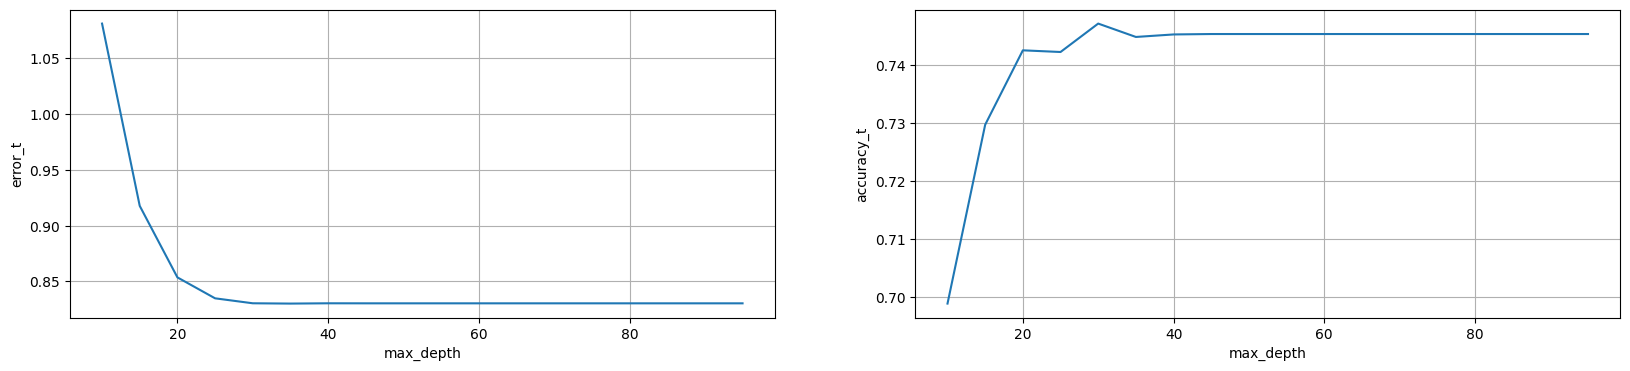

In [112]:
#优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi = 100)
axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("error_t")

axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()

In [113]:
#确定最优的min_samples_leaf
tuned_parameters = range(1, 10, 2)

#创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

#创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

#调优过程实现
for i, one_parameter in enumerate(tuned_parameters):
    rf2 = RandomForestClassifier(n_estimators=175, 
                                 max_depth=30, 
                                 max_features=15, 
                                 min_samples_leaf=one_parameter, 
                                 oob_score=True, 
                                 random_state=0, 
                                 n_jobs=-1)
    rf2.fit(x_train, y_train)
    #输出accuracy
    accuracy_t[i] = rf2.oob_score_
    #输出logloss
    y_pre = rf2.predict_proba(x_test)
    error_t[i] = log_loss(y_test, y_pre, eps=1e-15, normalize=True)

    print(error_t)

c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[0.70640181 0.         0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[0.70640181 0.74036802 0.         0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[0.70640181 0.74036802 0.77674199 0.         0.        ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[0.70640181 0.74036802 0.77674199 0.8002152  0.        ]
[0.70640181 0.74036802 0.77674199 0.8002152  0.8226409 ]


c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\18873\.conda\envs\d2l\lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


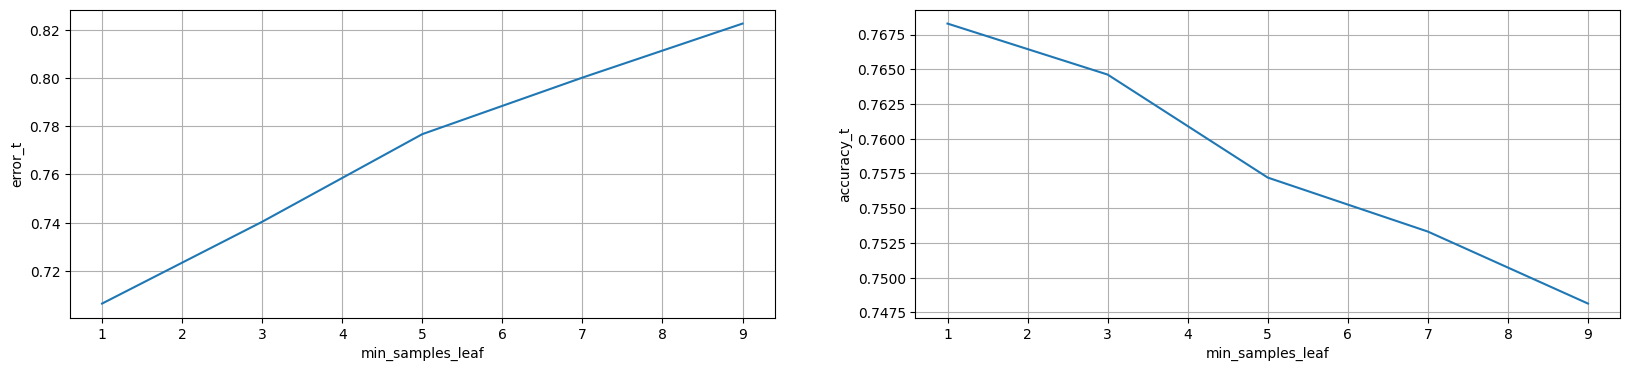

In [114]:
#优化结果过程可视化
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi = 100)
axes[0].plot(tuned_parameters, error_t)
axes[1].plot(tuned_parameters, accuracy_t)

axes[0].set_xlabel("min_samples_leaf")
axes[0].set_ylabel("error_t")

axes[1].set_xlabel("min_samples_leaf")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()

确定最优模型
n_estimators=175，
max_depth=30, 
max_features=15, 
min_samples_leaf=1,

In [116]:
rf3 = RandomForestClassifier(n_estimators=175,
                            max_depth=30,
                            max_features=15, 
                            min_samples_leaf=1, 
                            oob_score=True, 
                            random_state=40, 
                            n_jobs=-1)
rf3.fit(x_train, y_train)


RandomForestClassifier(max_depth=30, max_features=15, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=40)

In [117]:
rf3.oob_score_

0.7692252304147466

In [118]:
y_pre_proba =rf3.predict_proba(x_test)

log_loss(y_test, y_pre_proba)

0.7026290036874859

生成提交数据

In [119]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [120]:
test_data_drop_id = test_data.drop(['id'], axis=1)
test_data_drop_id.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [121]:
y_pre_test = rf3.predict_proba(test_data_drop_id)
y_pre_test

array([[4.00000000e-02, 8.68841782e-02, 9.99619048e-02, ...,
        6.33843318e-02, 0.00000000e+00, 3.42857143e-02],
       [9.14285714e-02, 6.28571429e-02, 3.33333333e-02, ...,
        3.42857143e-02, 1.77142857e-01, 3.42857143e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.14285714e-02, 0.00000000e+00],
       ...,
       [2.28571429e-02, 3.17619048e-01, 3.55238095e-01, ...,
        2.85714286e-02, 1.14285714e-02, 0.00000000e+00],
       [3.00225169e-05, 1.82215993e-01, 1.02023151e-01, ...,
        1.77407452e-02, 0.00000000e+00, 2.00150113e-05],
       [1.51191725e-02, 1.88552468e-01, 2.93043915e-01, ...,
        2.29307162e-01, 2.58435032e-04, 2.84126719e-03]])

In [123]:
result_data=pd.DataFrame(y_pre_test, columns=['Class_'+str(i) for i in range(1, 10)])
result_data.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.040000,0.086884,0.099962,0.669770,0.000000,0.005714,0.063384,0.000000,0.034286
1,0.091429,0.062857,0.033333,0.086667,0.028571,0.451429,0.034286,0.177143,0.034286
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.988571,0.000000,0.011429,0.000000
3,0.017143,0.341905,0.252381,0.217143,0.000000,0.000000,0.005714,0.011429,0.154286
4,0.202777,0.000000,0.005714,0.000336,0.001008,0.000168,0.012653,0.212141,0.565202


In [124]:
result_data.insert(loc=0, column='id', value=test_data.id)
result_data.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.040000,0.086884,0.099962,0.669770,0.000000,0.005714,0.063384,0.000000,0.034286
1,2,0.091429,0.062857,0.033333,0.086667,0.028571,0.451429,0.034286,0.177143,0.034286
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.988571,0.000000,0.011429,0.000000
3,4,0.017143,0.341905,0.252381,0.217143,0.000000,0.000000,0.005714,0.011429,0.154286
4,5,0.202777,0.000000,0.005714,0.000336,0.001008,0.000168,0.012653,0.212141,0.565202


In [ ]:
result_data.to_csv(r"C:\Users\18873\Desktop\python\ML\RandomForster\submission.csv")